<a href="https://colab.research.google.com/github/TingLin-Hsiao/special-octo-spork/blob/main/aigo_random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#載入data
from sklearn.datasets import load_iris
from pprint import pprint
iris=load_iris()
pprint(iris)

[Text(0.4, 0.8333333333333334, 'petal width (cm) <= 0.8\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'petal width (cm) <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

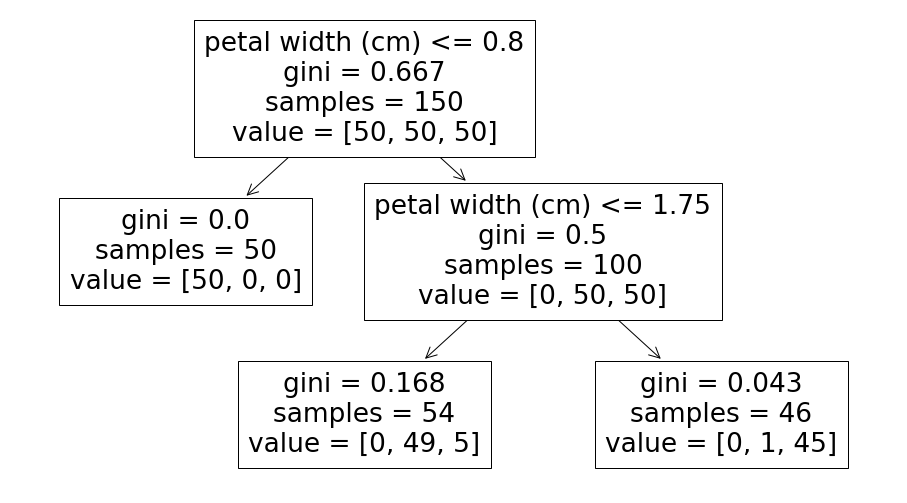

In [ ]:
#決策樹
from matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeClassifier, plot_tree

tree=DecisionTreeClassifier(max_depth=2)  #建樹 限制樹的深度
tree.fit(iris.data,iris.target)      #train樹

figure(figsize=(16,9),dpi=72)       #圖的大小

plot_tree(tree, feature_names=iris.feature_names) #畫圖

[Text(0.6, 0.8333333333333334, 'petal width (cm) <= 1.7\ngini = 0.663\nsamples = 92\nvalue = [28, 29, 35]'),
 Text(0.4, 0.5, 'petal width (cm) <= 0.75\ngini = 0.517\nsamples = 58\nvalue = [28, 29, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 28\nvalue = [28, 0, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.064\nsamples = 30\nvalue = [0, 29, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 34\nvalue = [0, 0, 34]')]

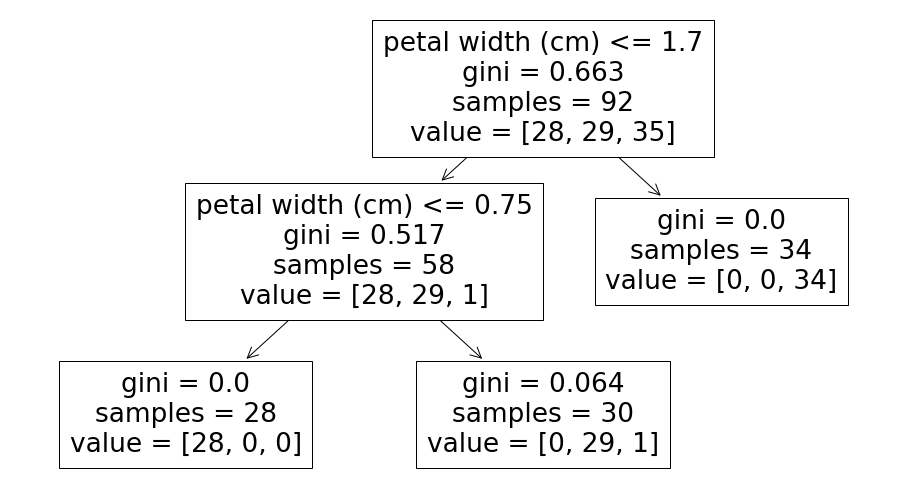

In [ ]:
#對樣本boostrsp
import random

def boostrap(x,y):
  n=len(x)      #資料個數
  assert len(y)==n
  indices=random.choices(range(n),k=n)  #隨機取樣 取k個 可重複
  indices=list(set(indices))       #利用set使重複的資料只出現一次
  return x[indices],y[indices] 
x,y=boostrap(iris.data,iris.target)     #把x,y隨機取樣


tree=DecisionTreeClassifier(max_depth=2)  #建樹 限制樹的深度
tree.fit(x,y)                #train樹

figure(figsize=(16,9),dpi=72)        #圖的大小
plot_tree(tree, feature_names=iris.feature_names)  #畫圖

In [ ]:
import pandas as pd

def boostrap_forest_fit(x,y,m=14,mdepth=2): # m:要多少棵樹
  forest=[]
  for i in range(m):
    xx,yy=boostrap(x,y)         #取樣
    tree=DecisionTreeClassifier(max_depth=mdepth) #建樹
    tree.fit(xx,yy)           #train樹
    forest.append(tree)         #存樹
  return forest

def boostrap_forest_predict(forest,x):
  votes=pd.DataFrame()
  for i in range(len(forest)):
    votes[i]=forest[i].predict(x)    #讓每顆樹投票
  votes['mode']=votes.mode(axis='columns') #投票結果 取眾數
  print(votes)

forest=boostrap_forest_fit(iris.data,iris.target) #建boostrap森林
boostrap_forest_predict(forest,iris.data)     #預測結果


     0  1  2  3  4  5  6  7  8  9  10  11  12  13  mode
0    0  0  0  0  0  0  0  0  0  0   0   0   0   0     0
1    0  0  0  0  0  0  0  0  0  0   0   0   0   0     0
2    0  0  0  0  0  0  0  0  0  0   0   0   0   0     0
3    0  0  0  0  0  0  0  0  0  0   0   0   0   0     0
4    0  0  0  0  0  0  0  0  0  0   0   0   0   0     0
..  .. .. .. .. .. .. .. .. .. ..  ..  ..  ..  ..   ...
145  2  2  2  2  2  2  2  2  2  2   2   2   2   2     2
146  2  2  2  2  2  2  2  2  2  2   2   2   2   2     2
147  2  2  2  2  2  2  2  2  2  2   2   2   2   2     2
148  2  2  2  2  2  2  2  2  2  2   2   2   2   2     2
149  2  2  2  2  2  2  2  2  2  2   2   2   2   2     2

[150 rows x 15 columns]


In [ ]:
from sklearn.ensemble import RandomForestClassifier #載入 sklearn 的 隨機森林

forest=RandomForestClassifier(max_depth=2)    #建森林 限制樹的深度
forest.fit(iris.data,iris.target)         #train森林

print(forest.predict(iris.data))         #印結果

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1
 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 1 2 2 2 2
 2 2 2 2 2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
